In [5]:
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
df=pd.read_csv('/kaggle/input/postpartum-depression/post natal data.csv')
df.head()


,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [7]:
df.describe()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,90,5,3,3,3,3,3,2,3,3,3
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,51,364,536,555,640,583,841,980,624,557,709


In [8]:
df.isna().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isna().sum()

Timestamp                                    0
Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [11]:
df.shape


(1491, 11)

In [12]:
import seaborn as sns
df.value_counts()


Timestamp        Age    Feeling sad or Tearful  Irritable towards baby & partner  Trouble sleeping at night  Problems concentrating or making decision  Overeating or loss of appetite  Feeling anxious  Feeling of guilt  Problems of bonding with baby  Suicide attempt      
6/14/2022 23:27  40-45  No                      Sometimes                         Yes                        Often                                      No                              Yes              No                No                             No                       7
6/14/2022 22:17  35-40  No                      Sometimes                         Yes                        No                                         Yes                             No               Yes               No                             Yes                      7
6/14/2022 23:26  30-35  Yes                     Yes                               No                         Often                                      Not at all            

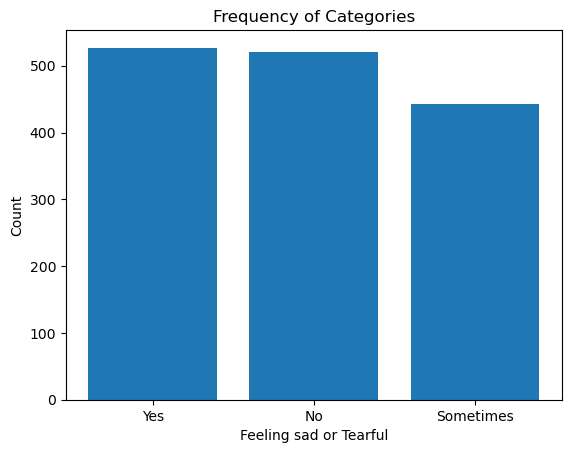

In [13]:
category_counts = df['Feeling sad or Tearful'].value_counts()
import matplotlib.pyplot as plt
# Plot a bar chart of the category frequencies
plt.bar(category_counts.index, category_counts.values)
plt.title('Frequency of Categories')
plt.xlabel('Feeling sad or Tearful')
plt.ylabel('Count')
plt.show()

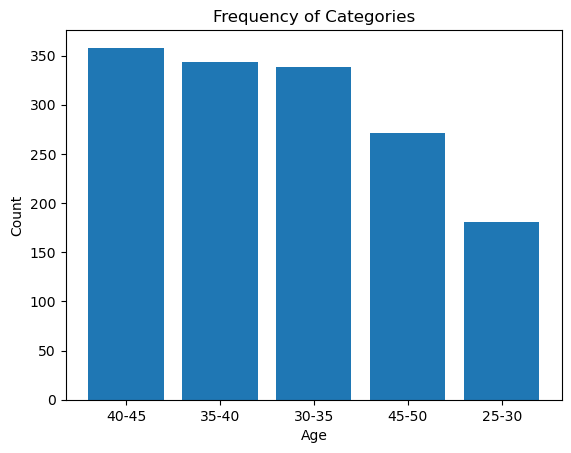

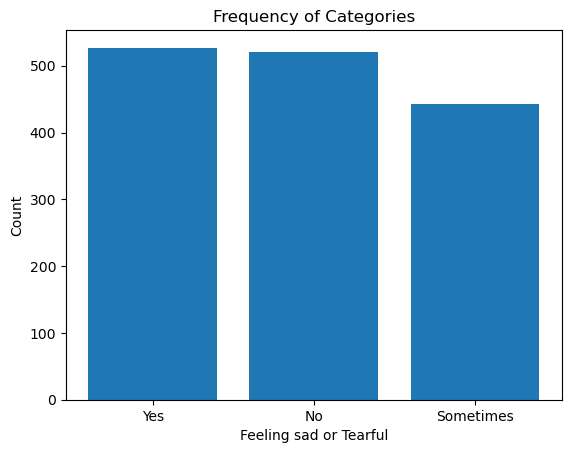

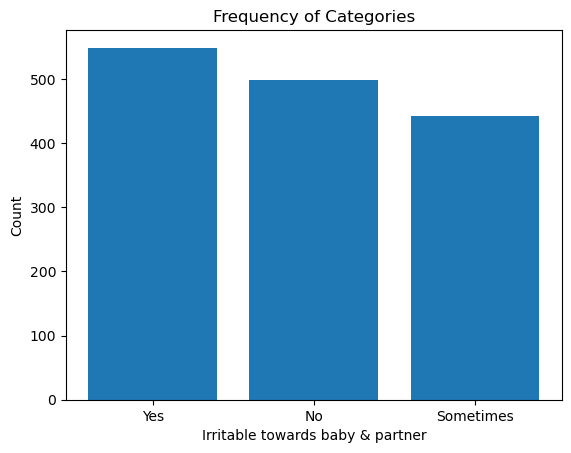

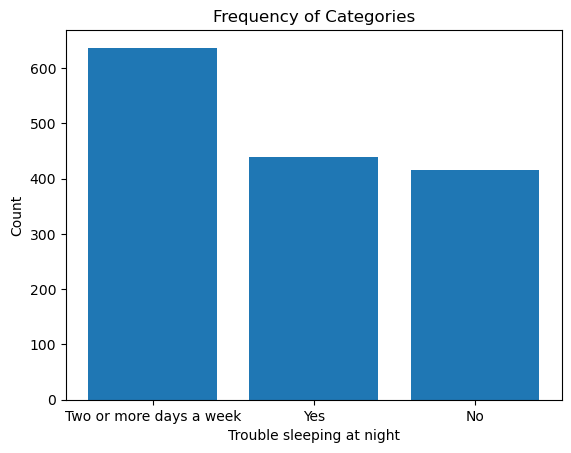

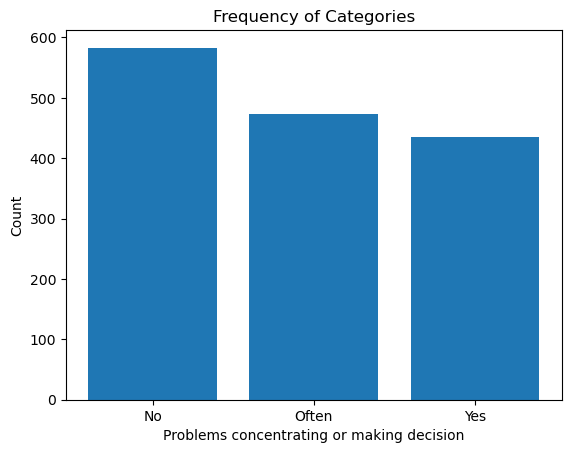

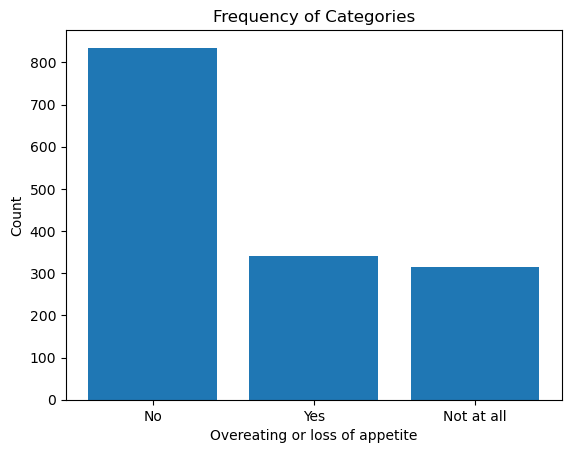

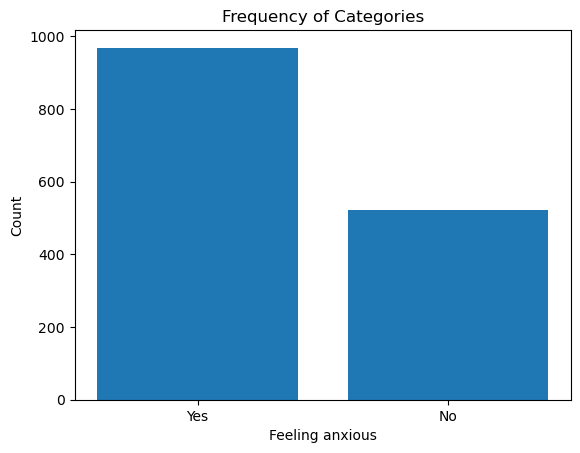

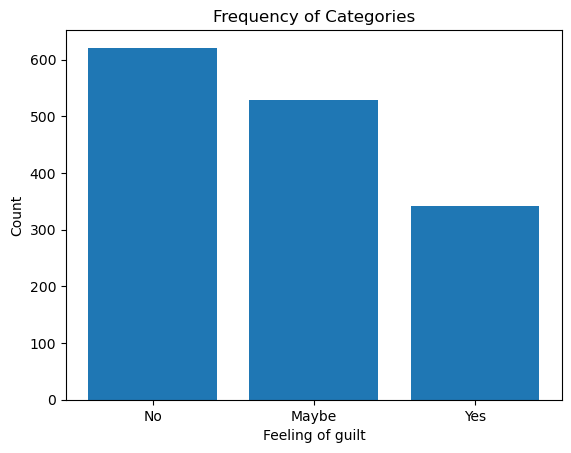

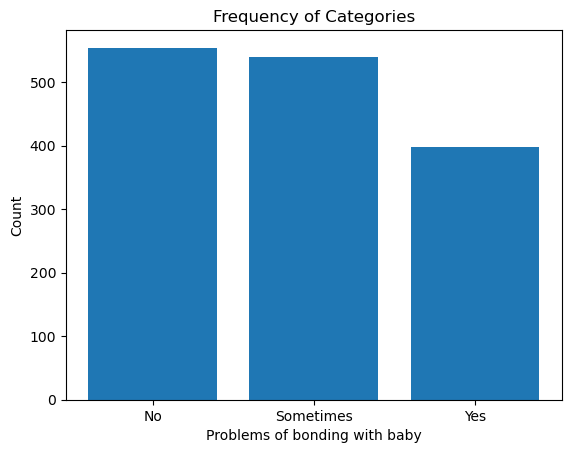

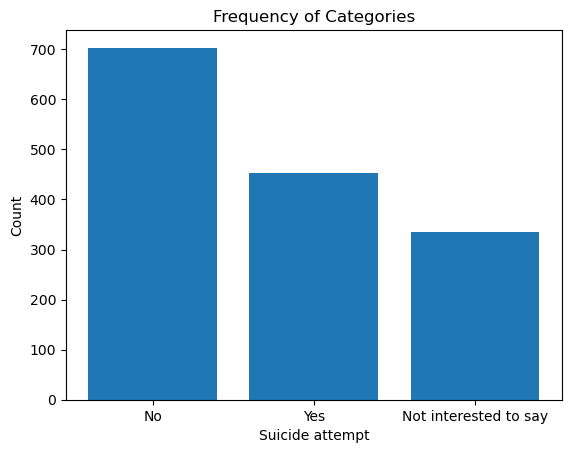

In [14]:
cols=[ 'Age','Feeling sad or Tearful',
'Irritable towards baby & partner',            
'Trouble sleeping at night',               
'Problems concentrating or making decision',  
'Overeating or loss of appetite',           
'Feeling anxious',                       
'Feeling of guilt',                            
'Problems of bonding with baby',             
'Suicide attempt']

for col in cols:
    category_counts = df[col].value_counts()
    plt.bar(category_counts.index, category_counts.values)
    plt.title('Frequency of Categories')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    

In [15]:
from sklearn.model_selection import train_test_split
features = df.drop(['Feeling anxious','Timestamp'],axis=1)  
target = df.loc[:, 'Feeling anxious']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, # use 30% of data as test set
                                                                            random_state=1)
print(features_train.shape)
print(features_test.shape) 
print(target_train.shape) 
print(target_test.shape)

(1043, 9)
(448, 9)
(1043,)
(448,)


In [16]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(),['Age',
         'Feeling sad or Tearful',
         'Irritable towards baby & partner',            
'Trouble sleeping at night',               
'Problems concentrating or making decision',  
'Overeating or loss of appetite',                                 
'Feeling of guilt',                            
'Problems of bonding with baby',             
'Suicide attempt'])])
pipeline = Pipeline([('preprocessor', preprocessor)])


# Fit and transform the data
features_train_transformed = preprocessor.fit_transform(features_train)
features_test_transformed = preprocessor.transform(features_test)
print(features_train_transformed.shape) 
print(features_test_transformed.shape) 

(1043, 29)
(448, 29)


In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
search_space_rf = {'max_depth': np.geomspace(start=3,
                                             stop=50, 
                                             num=10,
                                             dtype='int'),
                   'min_samples_leaf': np.geomspace(start=1, stop=500,
                                                    num=10, dtype='int')}
rf= RandomForestClassifier(class_weight='balanced',
                           n_estimators = 50,random_state=0)

model_rf= GridSearchCV(estimator = rf, param_grid=search_space_rf,
                       n_jobs=-1,cv=5,scoring='accuracy')
model_rf.fit(features_train_transformed,target_train)
print(model_rf.best_estimator_)
print(model_rf.best_score_)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=0)
0.9616580787633419


In [18]:
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names()
print(ohe_feature_names)
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)
model.fit(features_train_transformed,target_train)
from sklearn.tree import export_graphviz
tree_string=export_graphviz(decision_tree=model,
                            feature_names=ohe_feature_names,
                            class_names=['yes','no'],
                            filled=True,impurity=True)
print(tree_string)

from sklearn import tree




['x0_25-30' 'x0_30-35' 'x0_35-40' 'x0_40-45' 'x0_45-50' 'x1_No'
 'x1_Sometimes' 'x1_Yes' 'x2_No' 'x2_Sometimes' 'x2_Yes' 'x3_No'
 'x3_Two or more days a week' 'x3_Yes' 'x4_No' 'x4_Often' 'x4_Yes' 'x5_No'
 'x5_Not at all' 'x5_Yes' 'x6_Maybe' 'x6_No' 'x6_Yes' 'x7_No'
 'x7_Sometimes' 'x7_Yes' 'x8_No' 'x8_Not interested to say' 'x8_Yes']
digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x6_No <= 0.5\ngini = 0.5\nsamples = 1043\nvalue = [521.5, 521.5]\nclass = no", fillcolor="#ffffff"] ;
1 [label="x7_No <= 0.5\ngini = 0.434\nsamples = 588\nvalue = [453.542, 212.379]\nclass = yes", fillcolor="#f1bc96"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x6_Yes <= 0.5\ngini = 0.5\nsamples = 364\nvalue = [187.622, 179.124]\nclass = yes", fillcolor="#fef9f6"] ;
1 -> 2 ;
3 [label="gini = 0.455\nsamples = 268\nvalue = [85.686, 158.717]\nclass = no", fillcolor="#a4d2f3"] ;
2 -> 3 ;
4 [label="gini = 0

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Define a dictionary of models
models = {
'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=0),
'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0),
'Naive Bayes': CategoricalNB(),
'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
'Support Vector Machines': SVC(kernel='linear', C=1.0),
'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Loop through the models and train and test each model
for name, model in models.items():
    print('Training and testing', name)
    model.fit(features_train_transformed, target_train)
    target_pred = model.predict(features_test_transformed)
    accuracy = accuracy_score(target_test, target_pred)
    print('Accuracy:', accuracy)


Training and testing Decision Tree
Accuracy: 0.8816964285714286
Training and testing Random Forest
Accuracy: 0.9241071428571429
Training and testing Gradient Boosting
Accuracy: 0.9821428571428571
Training and testing Naive Bayes
Accuracy: 0.8102678571428571
Training and testing K-Nearest Neighbors
Accuracy: 0.9107142857142857
Training and testing Support Vector Machines
Accuracy: 0.8459821428571429
Training and testing Neural Networks
Accuracy: 0.9866071428571429
